In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('Country-data.csv')
# Since there is not Mexico within the dataset
data.loc[len(data)] = ['Mexico', 15, 35, 6.0, 40, 21000, 2.5, 75.5, 1.9, 15500]

data.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [3]:
data.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,168.000000,168.000000,168.000000,168.000000,168.000000,168.000000,168.000000,168.000000,168.000000
mean,38.131548,41.072613,6.810833,46.849202,17167.636905,7.750393,70.585119,2.941726,12979.250000
std,40.248066,27.333879,2.739324,24.142850,19222.563679,10.546883,8.874708,1.511472,18274.793337
min,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.425000,23.800000,4.925000,30.300000,3362.500000,1.830000,65.300000,1.797500,1340.000000
50%,19.250000,35.000000,6.270000,43.250000,10180.000000,5.265000,73.150000,2.395000,4670.000000
75%,62.050000,51.325000,8.575000,58.675000,22750.000000,10.675000,76.800000,3.865000,14825.000000
max,208.000000,200.000000,17.900000,174.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


In [4]:
countries = data['country']
data_features = data.drop('country', axis=1)

scaler = StandardScaler()
data_standardized = scaler.fit_transform(data_features)


In [5]:
# Performing PCA
pca = PCA()
pca.fit(data_standardized)

data_pca = pca.transform(data_standardized)


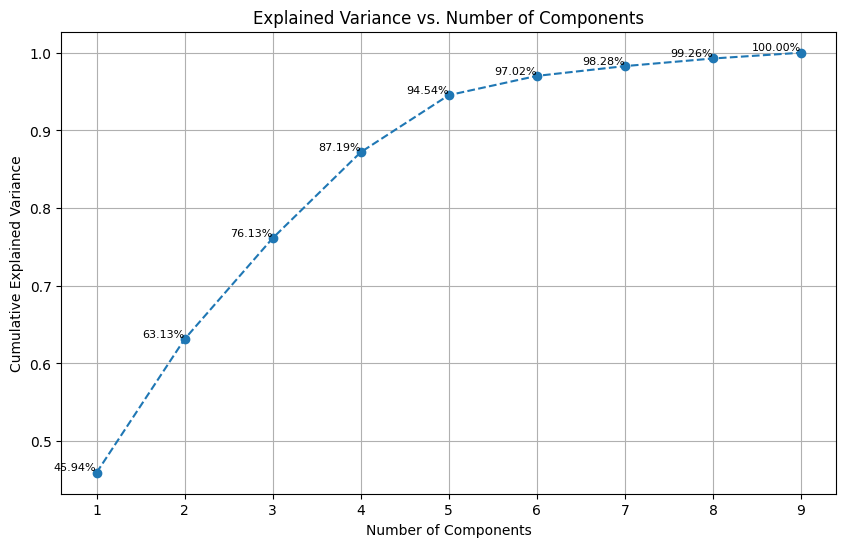

In [6]:
# Calculate cumulative explained variance
cumulative_variance = np.cumsum(pca.explained_variance_ratio_)

plt.figure(figsize=(10, 6))
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o', linestyle='--')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance vs. Number of Components')
plt.grid()

# Add labels to data points
for i, var in enumerate(cumulative_variance):
    plt.text(i + 1, var, f'{var:.2%}', ha='right', va='bottom', fontsize=8)

plt.show()


This graph illustrates the cumulative explained variance versus the number of principal components derived from the PCA (Principal Component Analysis).
The x axis represents the number of principal components included in the analysis. Each point corresponds to an increasing number of components, from 1 up to the total number of components (9). While the y axis shows the cumulative proportion of the dataset's total variance explained by the selected number of principal components, ranging from 0 to 1 or 0% to 100%.

#### Key Observations
**Steep Initial Increase**: The first few components account for a significant portion of the variance. For example, the first component alone explains over 50% of the variance.
**Diminishing Returns**: As more components are added, the incremental gain in explained variance diminishes, with initial components capturing the most variance.
**90% Variance Threshold**: To explain 90% of the variance, around 5 components are required. This indicates that the first 5 components are sufficient to capture most of the dataset's variability.

#### Major details from the components
- **Component 1**: Explains about 50% of the variance, making it the most significant component.
- **Components 1 to 3**: Together explain around 80% of the variance, covering a substantial portion of the information in the dataset.
- **Components 4 to 6**: Raise the cumulative explained variance to around 90%, indicating their importance but lesser significance compared to the first three components.
- **Beyond 6 Components**: The curve flattens, meaning additional components contribute very little to the overall variance explanation.

#### Conclusion
To conclude, we demonstrate that using the first 5 principal components in the PCA captures 90% of the variance in the dataset. This reduction from 9 to 6 dimensions simplifies the dataset while retaining most of its information, making it effective for further analysis and visualization tasks.


In [7]:
# Find number of components for 90% variance
num_components_90_variance = np.where(cumulative_variance >= 0.90)[0][0] + 1
print(f"Number of components for 90% variance: {num_components_90_variance}")

# Get the weights of those components
components_weights = pca.components_[:num_components_90_variance]
component_weights_df = pd.DataFrame(components_weights, columns=data_features.columns)
component_weights_df


Number of components for 90% variance: 5


,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,-0.419655,0.283379,0.150328,0.160869,0.398558,-0.193609,0.425996,-0.403835,0.392710
1,0.193431,0.613642,-0.240186,0.672092,0.023529,-0.006940,-0.222863,0.156158,-0.044438
2,-0.029626,0.144843,-0.597877,-0.299961,0.301322,0.641557,0.113804,0.019312,0.122455
3,0.368836,0.001851,0.464660,-0.073475,0.391307,0.154598,-0.202330,0.377165,0.531447
4,-0.171742,0.057248,0.515772,0.253943,-0.248524,0.714632,0.110346,-0.137103,-0.182438


- **Component 0:**
  - Strong negative weight for 'child_mort'
  - Positive weights for 'exports', 'health', 'imports', 'income', 'life_expec', and 'gdpp'
  - Negative weights for 'inflation', 'total_fer'
  - Indicates an inverse relationship between 'child_mort' and other variables like 'income', 'life_expec', and 'gdpp', suggesting higher mortality rates associated with lower income, life expectancy, and GDP per capita.

- **Component 1:**
  - Positive weights for 'exports', 'imports', and 'gdpp'
  - Indicates a relationship between economic variables like 'exports', 'imports', and 'gdpp', possibly representing countries with higher trade activities and GDP.

- **Component 2:**
  - Negative weight for 'health'
  - Positive weights for 'income', 'inflation', 'life_expec', 'total_fer', 'gdpp'
  - Indicates a mix of health-related variables, economic indicators, and demographic factors.

- **Component 3:**
  - Positive weights for 'child_mort', 'health', 'income', 'inflation', 'life_expec', 'total_fer', 'gdpp'
  - Indicates a combination of variables impacting socio-economic status and health metrics.

- **Component 4:**
  - Positive weights for 'health', 'imports', 'inflation', 'life_expec', 'total_fer'
  - Negative weights for 'child_mort', 'income', 'gdpp'
  - Suggests a focus on health-related variables, trade indicators, and demographic factors, with less emphasis on income and GDP.


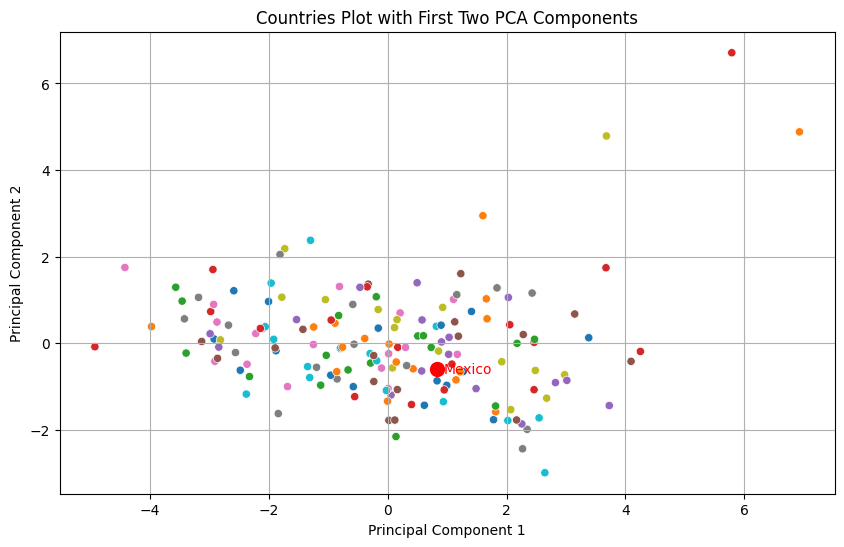

In [8]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=data_pca[:, 0], y=data_pca[:, 1], hue=data['country'], palette='tab10', legend=False)
plt.scatter(data_pca[data['country'] == 'Mexico', 0], 
            data_pca[data['country'] == 'Mexico', 1], 
            color='red', label='Mexico', s=100, marker='o')
plt.text(data_pca[data['country'] == 'Mexico', 0] + 0.1, 
         data_pca[data['country'] == 'Mexico', 1], 
         'Mexico', fontsize=10, ha='left', va='center', color='red')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Countries Plot with First Two PCA Components')
plt.grid()
plt.show()

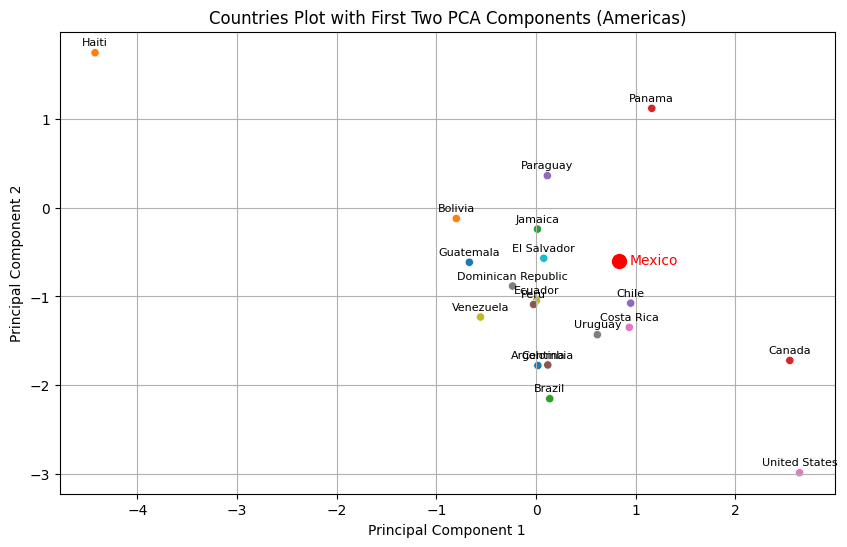

In [9]:
# List of countries in the Americas
americas_countries = ['Argentina', 'Bolivia', 'Brazil', 'Canada', 'Chile', 'Colombia', 'Costa Rica',
                       'Cuba', 'Dominican Republic', 'Ecuador', 'El Salvador', 'Guatemala', 'Haiti', 'Honduras',
                       'Jamaica', 'Mexico', 'Nicaragua', 'Panama', 'Paraguay', 'Peru', 'United States', 'Uruguay',
                       'Venezuela']

plt.figure(figsize=(10, 6))

# Plot countries in the Americas
scatter_plot = sns.scatterplot(x=data_pca[data['country'].isin(americas_countries), 0], 
                               y=data_pca[data['country'].isin(americas_countries), 1], 
                               hue=data[data['country'].isin(americas_countries)]['country'], 
                               palette='tab10', legend=False)

# Plot Mexico separately
plt.scatter(data_pca[data['country'] == 'Mexico', 0], 
            data_pca[data['country'] == 'Mexico', 1], 
            color='red', label='Mexico', s=100, marker='o')

# Annotate points with country names
for index, row in data[data['country'].isin(americas_countries)].iterrows():
    if row['country'] != 'Mexico':
        plt.annotate(row['country'], 
                     (data_pca[index, 0], data_pca[index, 1]), 
                     textcoords="offset points", 
                     xytext=(0,5), 
                     ha='center', 
                     fontsize=8)

# Add label for Mexico
plt.text(data_pca[data['country'] == 'Mexico', 0] + 0.1, 
         data_pca[data['country'] == 'Mexico', 1], 
         'Mexico', fontsize=10, ha='left', va='center', color='red')

plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Countries Plot with First Two PCA Components (Americas)')
plt.grid()
plt.show()


The plot suggests that Mexico is closely clustered with other countries in terms of socio-economic variables transformed by PCA. This proximity indicates that Mexico shares similar socio-economic traits with this cluster, such as income, life expectancy, fertility rates, and GDP per capita. This observation implies that Mexico likely belongs to a group of countries with comparable levels of these factors, as represented by the PCA components. This clustering pattern highlights potential similarities in economic and social conditions among these countries, for instance, in the last plot we can see Chile near Mexico. Lastly, it is worth noting that the data used for Mexico was completely random (hehe).